# Titanic Survive Prediction 
Titanic is kaggle's competion where goal is to predict where passenger will survive or not.


## Import Required Libraries

Firt thing first. It is very important to import all necessary python libraries. 
I am going to import NumPy and Pandas for Data Analysis. For visualization I am going to use Matplotlib and Seaborn. 

In [771]:
# data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

sns.set_style('dark')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
"""
from google.colab import files
files.upload() #upload kaggle.json if u have keggle files directly upload them and comment next line in this block
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c titanic
"""

'\nfrom google.colab import files\nfiles.upload() #upload kaggle.json if u have keggle files directly upload them and comment next line in this block\n!pip install -q kaggle\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!ls ~/.kaggle\n!chmod 600 /root/.kaggle/kaggle.json\n!kaggle competitions download -c titanic\n'

# Load Data

Once you are dont with libraries, second step is to import dataset. As you can see in above cell's output. There is 3 files in our input folder. 
1. train.csv -- our training file.
2. test.csv -- using our machine learning model we have to predict whethere gicen entries in this file will survive or not.
3. gender_submission.csv -- sample submission file.


So I am going to load train.csv and test.csv in different data frames.

In [772]:
# load train data
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [773]:
# load test data
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Looking into Training and Testing Data

In [774]:
print('='*50)
print("Number of columns in training data")
print('='*50)
print("\n")
print(train_data.columns.values)
print("\n")
print('='*50)
print("Number of columns in test data")
print('='*50)
print("\n")
print(test_data.columns.values)

Number of columns in training data


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Number of columns in test data


['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


From above column name we can see that test data doesn't have Survived column. That's our task to do. For test data we have to find out whethere give passenger will survive or not.

In [775]:
print('='*10)
print("Train data shape")
print('='*10)
print("\n")
print(train_data.shape)
print("\n")
print('='*10)
print("Test data shape")
print('='*10)
print("\n")
print(test_data.shape)

Train data shape


(891, 12)


Test data shape


(418, 11)


Describing training dataset

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [776]:
print('='*50)
print("\nDescribe traing data\n")
print('='*50) 
print("\n")
print(train_data.describe())


Describe traing data



       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


In [777]:
print("Describe test data")
print('='*50)
print(test_data.describe())

Describe test data
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Info of training data 

In [778]:
print('='*50)
print("\nTraining data info\n")
print('='*50)
print(train_data.info())
print("\n")
print('='*50)
print("\n Test data info \n")
print('='*50)
print("\n")
print(test_data.info())


Training data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



 Test data info 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P

We can see that Age, Cabin and Embarked have missing values.

Age and Embarked have only few missing values. Whereas Cabin column have so many missing values.

In [779]:
print('='*50)
print('\nNumber of null values in train data\n')
print('='*50)
print('\n')
print(train_data.isnull().sum())
print('\n')
print('='*50)
print('\n Number of null values in test data\n')
print('='*50)
print("\n")
print(test_data.isnull().sum())


Number of null values in train data



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



 Number of null values in test data



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Age Feature
One solution is to fill in the null values with the median age.

In [780]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

Cabin Feature
I'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.

In [781]:
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

 Ticket Feature
I will also drop the Ticket feature since it's unlikely to yield any useful information.

In [782]:
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

 Embarked Features
There is two missing embarked values in train data.

In [783]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

 Fare Feature
For only test data we have one missing value so I am going to fill that with median.

In [784]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [785]:
# let check missing value again
print('='*50)
print('\nNumber of null values in train data\n')
print('='*50)
print('\n')
print(train_data.isnull().sum())
print('\n')
print('='*50)
print('\n Number of null values in test data\n')
print('='*50)
print("\n")
print(test_data.isnull().sum())


Number of null values in train data



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64



 Number of null values in test data



PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Now we don't have any missing value in train and test data. Let's do some visuaization.

# EDA (Exploratory Data Analysis)

To make some observations and assumptions, we need to quickly analyze some feature correlations by pivoting features against each other. As we cleaned our data, we are able to make this correlation for every feature.

#### Observation: 

- It is clear that out of 891 passengers only 342 manage to survive. Which indicated majority of passengers died.
- **Sex** Female passenger have high priority of survival.
- **Pclass** First class passenger have higher change of survival, which is >50%.
- **Embarked** Passger who board the ship from Cherbourg.

In [786]:
# number of survived passengers
train_data.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [787]:
# percentage of male and female who survived
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [788]:
# percentage of people survived according to their Ticker Class
train_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [789]:
# Percentage of survived people based on their embarked. 
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [790]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [791]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Data Visualization

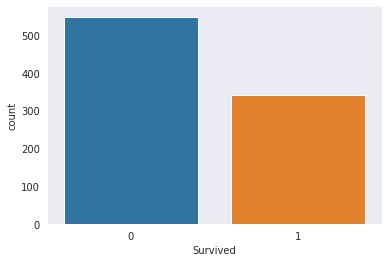

In [792]:
sns.countplot(x = 'Survived', data = train_data)

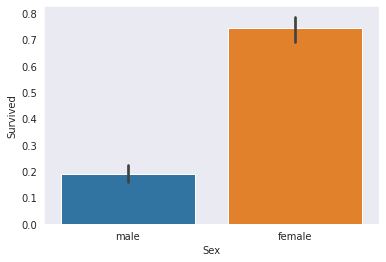

In [793]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train_data)

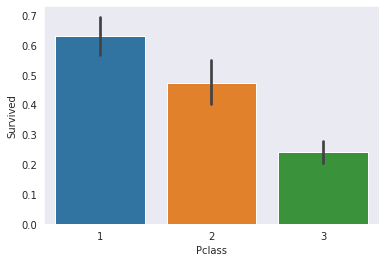

In [794]:
#draw a bar plot of survival by sex
sns.barplot(x="Pclass", y="Survived", data=train_data)

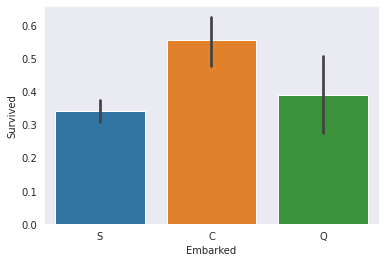

In [795]:
#draw a bar plot of survival by sex
sns.barplot(x = "Embarked", y = "Survived", data = train_data)

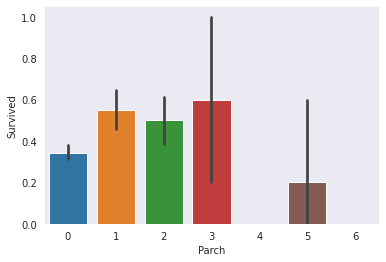

In [796]:
#draw a bar plot of survival by sex
sns.barplot(x="Parch", y="Survived", data=train_data)

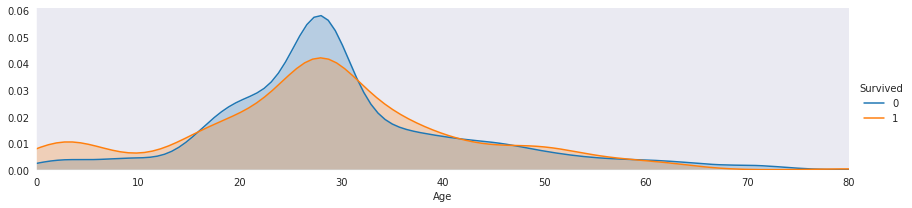

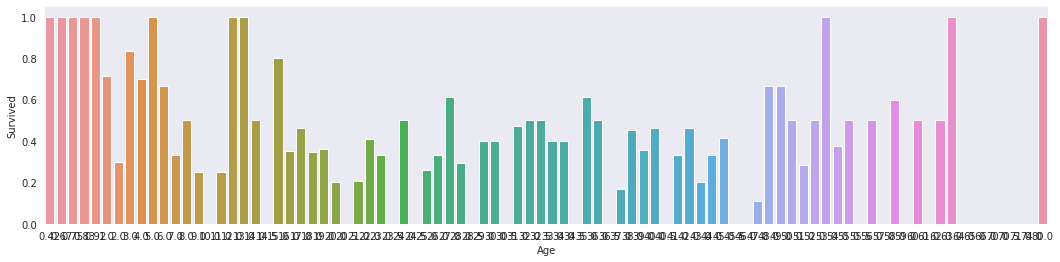

In [797]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

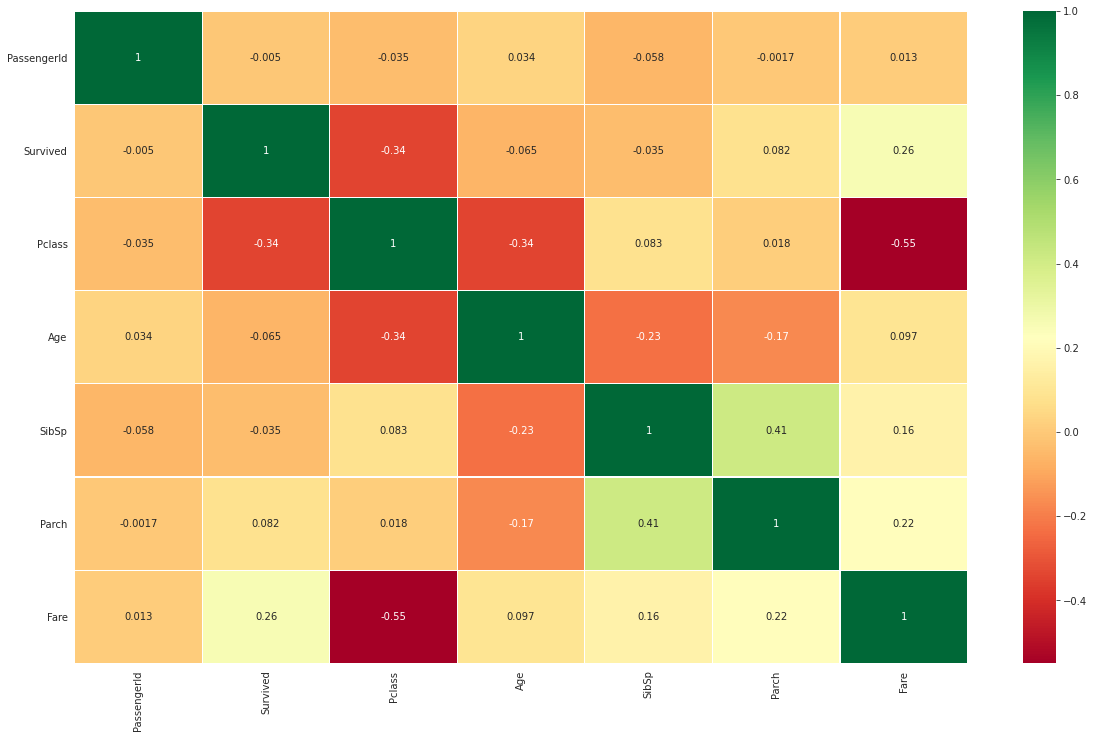

In [798]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

## Converting Categorial data to Numeric

In our data some of features are represent categorial values, like Sex, Embarked etc. So we have to convert them in numeric value.

In [799]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [800]:
paste=test_data.PassengerId
pastr=train_data.PassengerId

#Scalling the data set

In [801]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[train_data.columns[train_data.dtypes!="object"]]=scaler.fit_transform(train_data[train_data.columns[train_data.dtypes!="object"]])
test_data[test_data.columns[test_data.dtypes!="object"]]=scaler.fit_transform(test_data[test_data.columns[test_data.dtypes!="object"]])

In [802]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.000000,0.014151,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.000000,0.139136,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.000000,0.015469,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.000000,0.103644,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.000000,0.015713,S
...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,"Montvila, Rev. Juozas",male,0.334004,0.000,0.000000,0.025374,S
887,0.996629,1.0,0.0,"Graham, Miss. Margaret Edith",female,0.233476,0.000,0.000000,0.058556,S
888,0.997753,0.0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.346569,0.125,0.333333,0.045771,S
889,0.998876,1.0,0.0,"Behr, Mr. Karl Howell",male,0.321438,0.000,0.000000,0.058556,C


In [803]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})

In [804]:
train_data['Embarked'] = train_data['Embarked'].map({'Q':2, 'S':1, 'C':0})
test_data['Embarked'] = test_data['Embarked'].map({'Q':2, 'S':1, 'C':0})

# Model Prediction
Now our data is ready to prepare model to predict solution. There is plenty of predictive algorithm out there to try. However, our problem is classification problem thus I will try classification models. 

# First import all required machine learning libraries

In [805]:
# machine learning
from sklearn.linear_model import LogisticRegression


### Prepare data for train and test model.

In [806]:
X_train = train_data.drop(["Name", "Survived", "PassengerId"], axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop(['Name',"PassengerId"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

#Using logistic Regression as model and Predicting

In [807]:
logreg = LogisticRegression(random_state=0)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, Y_train)
logreg_Y_pred=logreg.predict(X_test)
logreg_accuracy=logreg.score(X_train,Y_train)
logreg_accuracy

0.7968574635241302

In [808]:
from sklearn.feature_selection import RFECV

#Select best feature 
rfe = RFECV(logreg)
rfe = rfe.fit(X_train, Y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True  True False False False]
[1 1 1 1 3 2 4]


Index(['Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')

In [810]:
X_train_rfe=sm.add_constant(X_train[X_train.columns[rfe.support_]])

###first model

In [811]:
import statsmodels.api as sm
glm = sm.GLM( Y_train,X_train_rfe, family=sm.families.Binomial())
glm_results = glm.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -395.62
Date:                Tue, 25 Aug 2020   Deviance:                       791.23
Time:                        17:58:05   Pearson chi2:                     917.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2453      0.331      3.760      0.0

####variance inflation factor

In [812]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe.drop("const",axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Age,2.15
0,Pclass,2.10
1,Sex,1.44
3,SibSp,1.24


since everything is below 5 vif this model is prefect

###predicting the values of training



In [813]:
y_train_pred=glm_results.predict(X_train_rfe)


# Plotting the ROC Curve

An ROC curve demonstrates several things:
• It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be
accompanied by a decrease in specificity).
• The closer the curve follows the left-hand border and then the top border of the ROC space,
the more accurate the test.
• The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the
test.


In [814]:
def draw_roc( actual, probs ):
  fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
  drop_intermediate = False )
  auc_score = metrics.roc_auc_score( actual, probs )
  plt.figure(figsize=(5, 5))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
  return None

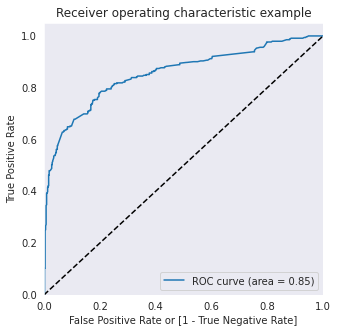

In [815]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train, y_train_pred, drop_intermediate = False )
draw_roc(Y_train, y_train_pred)

# Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [816]:
numbers = [float(x)/10 for x in range(10)]
y_train_pred_final=pd.DataFrame({"PassengerId": pastr, "Survived": y_train_pred})
for i in numbers:
  y_train_pred_final[i]= y_train_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,PassengerId,Survived,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.089969,1,0,0,0,0,0,0,0,0,0
1,2,0.895099,1,1,1,1,1,1,1,1,1,0
2,3,0.650602,1,1,1,1,1,1,1,0,0,0
3,4,0.905730,1,1,1,1,1,1,1,1,1,1
4,5,0.077718,1,0,0,0,0,0,0,0,0,0


In [818]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  cm1 = metrics.confusion_matrix(Y_train,  y_train_pred_final[i])
  total1=sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1
  speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.515152  0.938596  0.251366
0.2   0.2  0.712682  0.850877  0.626594
0.3   0.3  0.769921  0.818713  0.739526
0.4   0.4  0.792368  0.777778  0.801457
0.5   0.5  0.787879  0.710526  0.836066
0.6   0.6  0.811448  0.640351  0.918033
0.7   0.7  0.794613  0.511696  0.970856
0.8   0.8  0.763187  0.403509  0.987250
0.9   0.9  0.693603  0.207602  0.996357


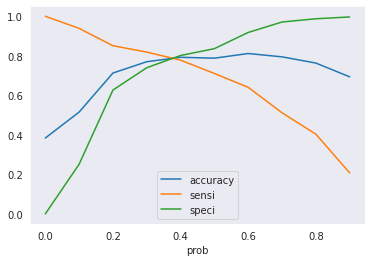

In [819]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [820]:
y_train_pred=y_train_pred.map(lambda x: 1 if x > 0.6 else 0)

#Accuracy

In [821]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train, y_train_pred )
print(confusion)

[[504  45]
 [123 219]]


In [822]:
print(metrics.accuracy_score(Y_train, y_train_pred))

0.8114478114478114


In [823]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [824]:
TP / float(TP+FN)

0.6403508771929824

In [825]:
TN / float(TN+FP)

0.9180327868852459

In [826]:
print(FP/ float(TN+FP))

0.08196721311475409


In [827]:
print (TP / float(TP+FP))


0.8295454545454546


In [828]:
print (TN / float(TN+ FN))

0.8038277511961722


Text(0.5, 0, 'Errors')

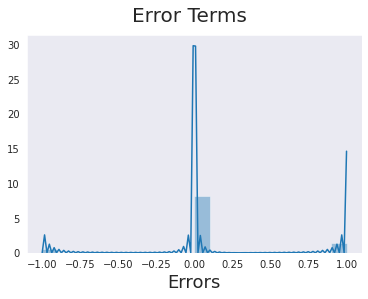

In [829]:
fig = plt.figure()
sns.distplot((Y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

In [830]:
X_test_new = X_test[X_train_rfe.drop("const",axis=1).columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [831]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.drop("const",axis=1).columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = glm_results.predict(X_test_new)

In [836]:
y_pred=y_pred.map(lambda x: 1 if x > 0.6 else 0)

In [837]:
ans=pd.DataFrame({"PassengerId": paste, "Survived": y_pred})
ans.to_csv('ans.csv', index=False)

In [838]:
"!kaggle competitions submit -c titanic -f ans.csv -m "this is Modini harsha uid 6104"

100% 2.77k/2.77k [00:02<00:00, 954B/s]
Successfully submitted to Titanic: Machine Learning from Disaster